In [90]:
# !pip install keras-tuner

In [91]:
# !pip install pandas
# !pip install sklearn
# !pip install scikit-learn
# !pip install matplotlib
# !pip install tensorflow

In [92]:
#Importing libraries

In [93]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [94]:
df =pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


# EDA

In [95]:
df.info()
pd.set_option("display.max_columns",None)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


Here we can see at first glance that the Month and Day are already been encoded so we can drop these redundant columns month and Day.And encode the size category.Also from info we saw that there are no empty values in the data set.

In [96]:
df=df.drop(columns=["month","day","area"],axis=1)

In [97]:
df["size_category"].unique()

array(['small', 'large'], dtype=object)

In [98]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the "size_category" column
df['size_category_encoded'] = encoder.fit_transform(df['size_category'])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,size_category_encoded
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,1


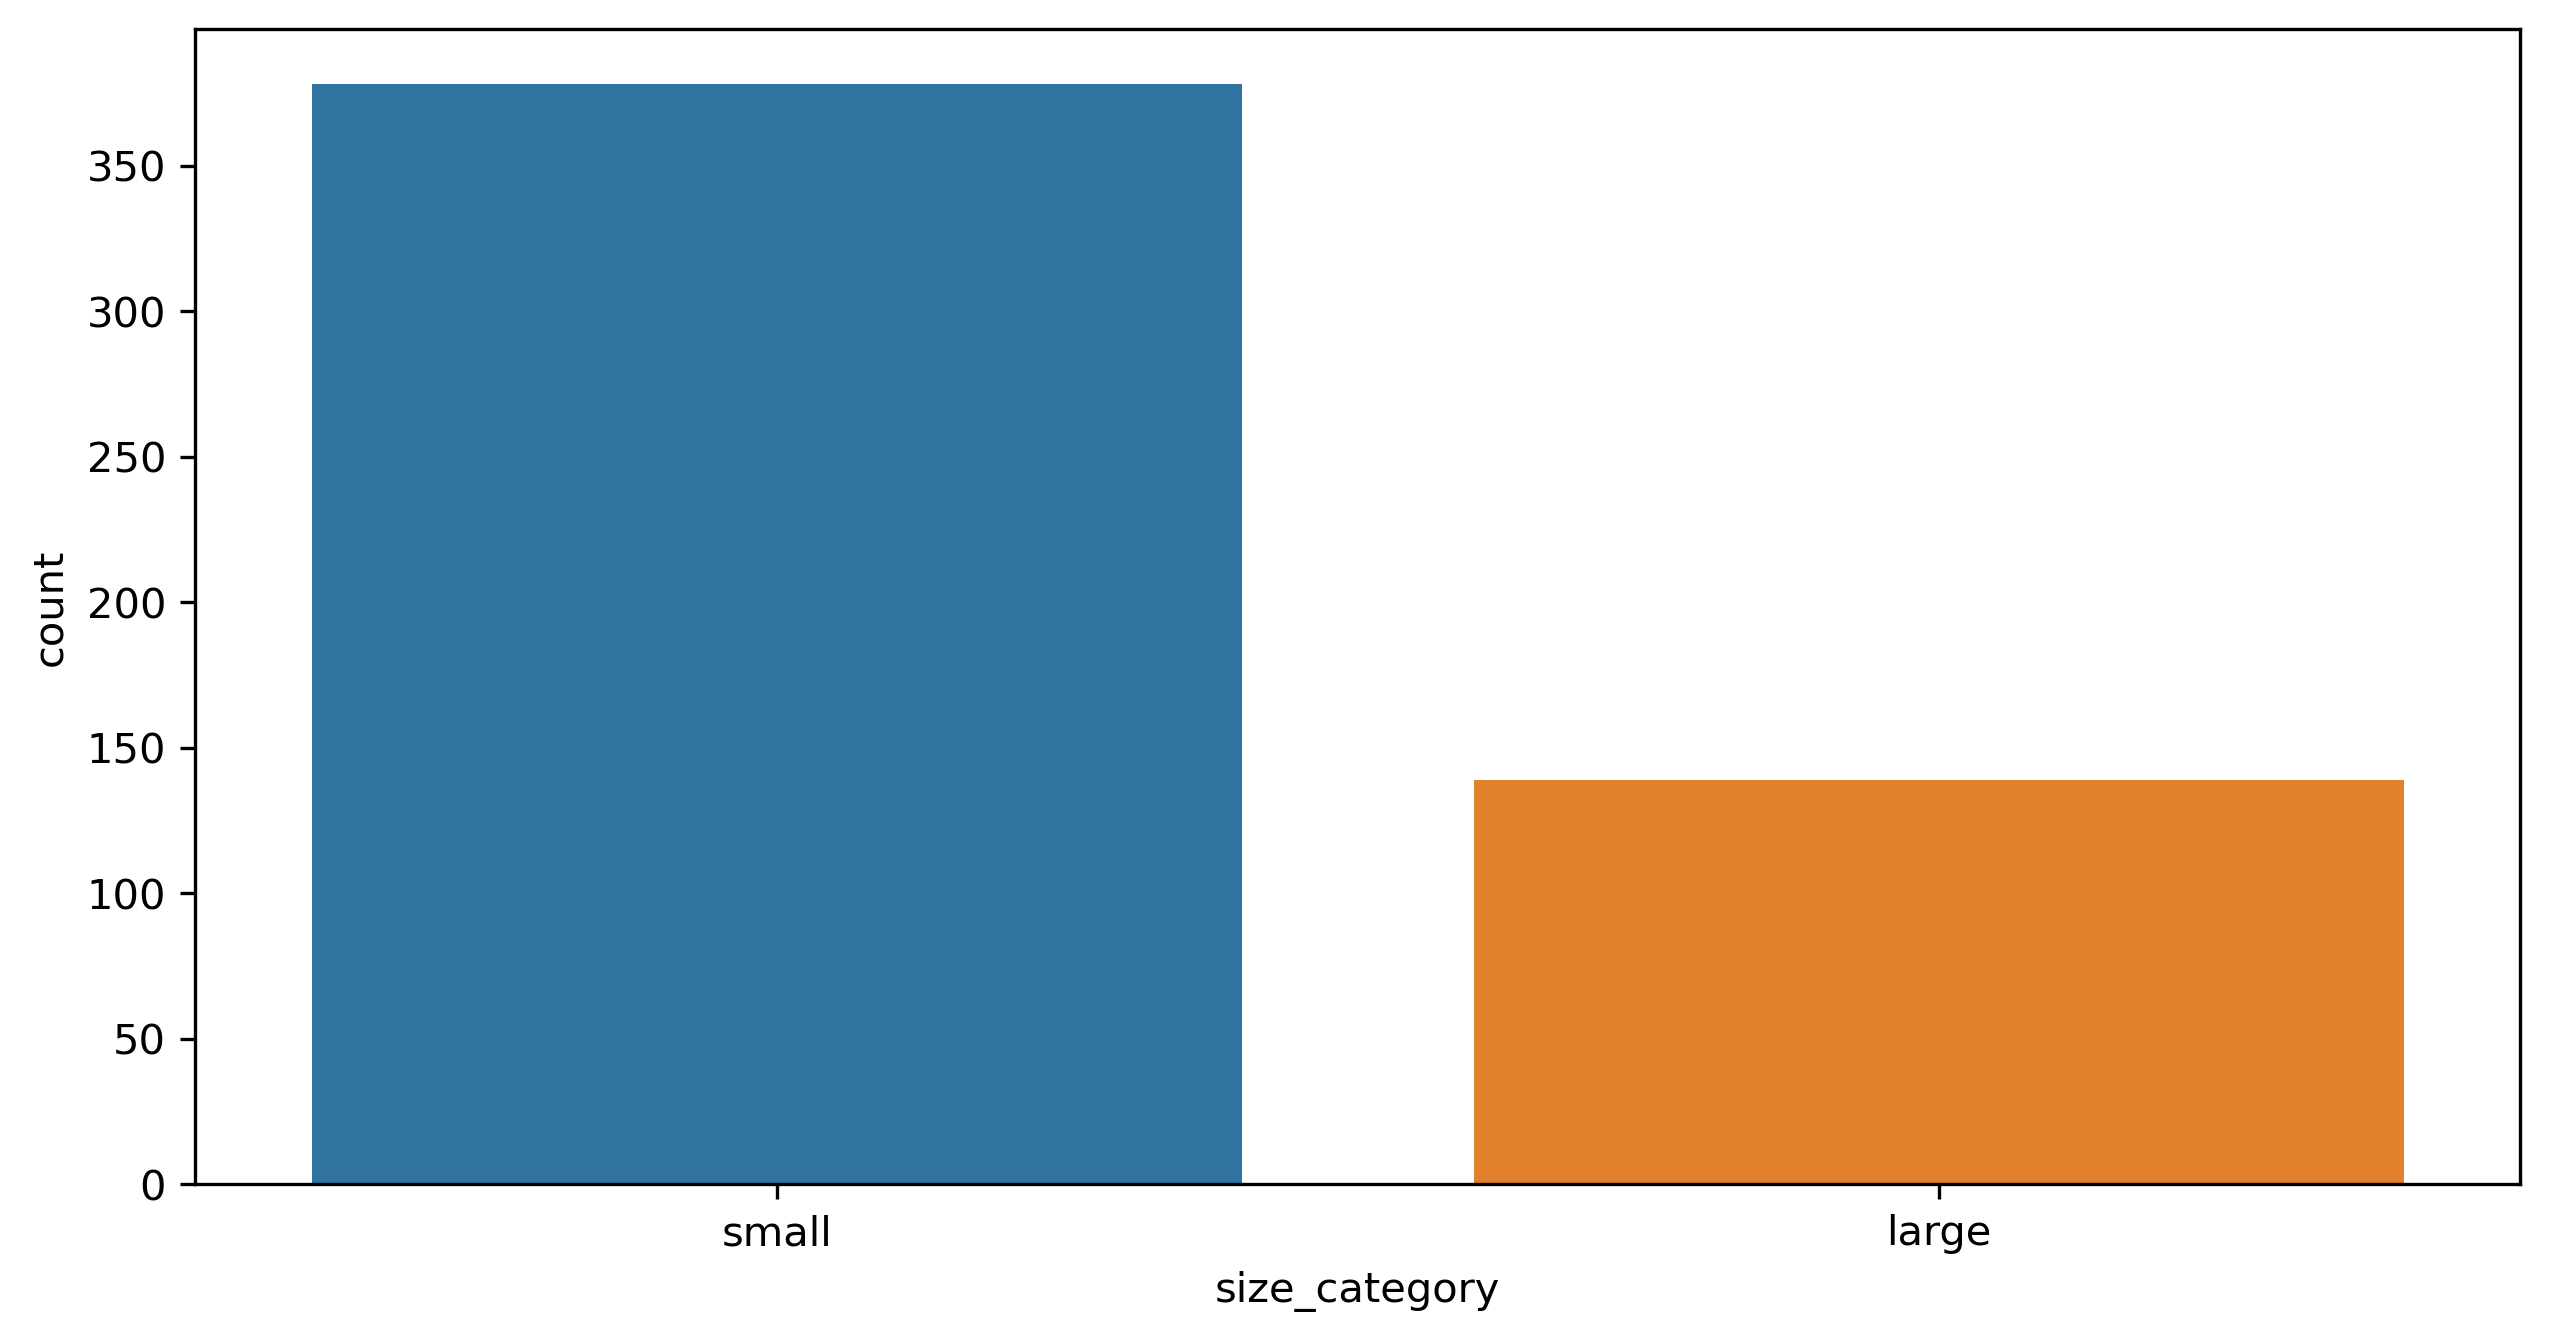

In [99]:
sns.countplot(df['size_category'])
plt.show()

In [100]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,size_category_encoded
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small,1


In [101]:
#Null values
df.isna().sum()

FFMC                     0
DMC                      0
DC                       0
ISI                      0
temp                     0
RH                       0
wind                     0
rain                     0
dayfri                   0
daymon                   0
daysat                   0
daysun                   0
daythu                   0
daytue                   0
daywed                   0
monthapr                 0
monthaug                 0
monthdec                 0
monthfeb                 0
monthjan                 0
monthjul                 0
monthjun                 0
monthmar                 0
monthmay                 0
monthnov                 0
monthoct                 0
monthsep                 0
size_category            0
size_category_encoded    0
dtype: int64

In [102]:
df=df.drop(columns=["size_category"],axis=1)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category_encoded
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [103]:
#Duplicate
df.duplicated().sum()

19

In [104]:
#Drop duplicate
df.drop_duplicates(inplace=True)

# Visualization

<AxesSubplot:>

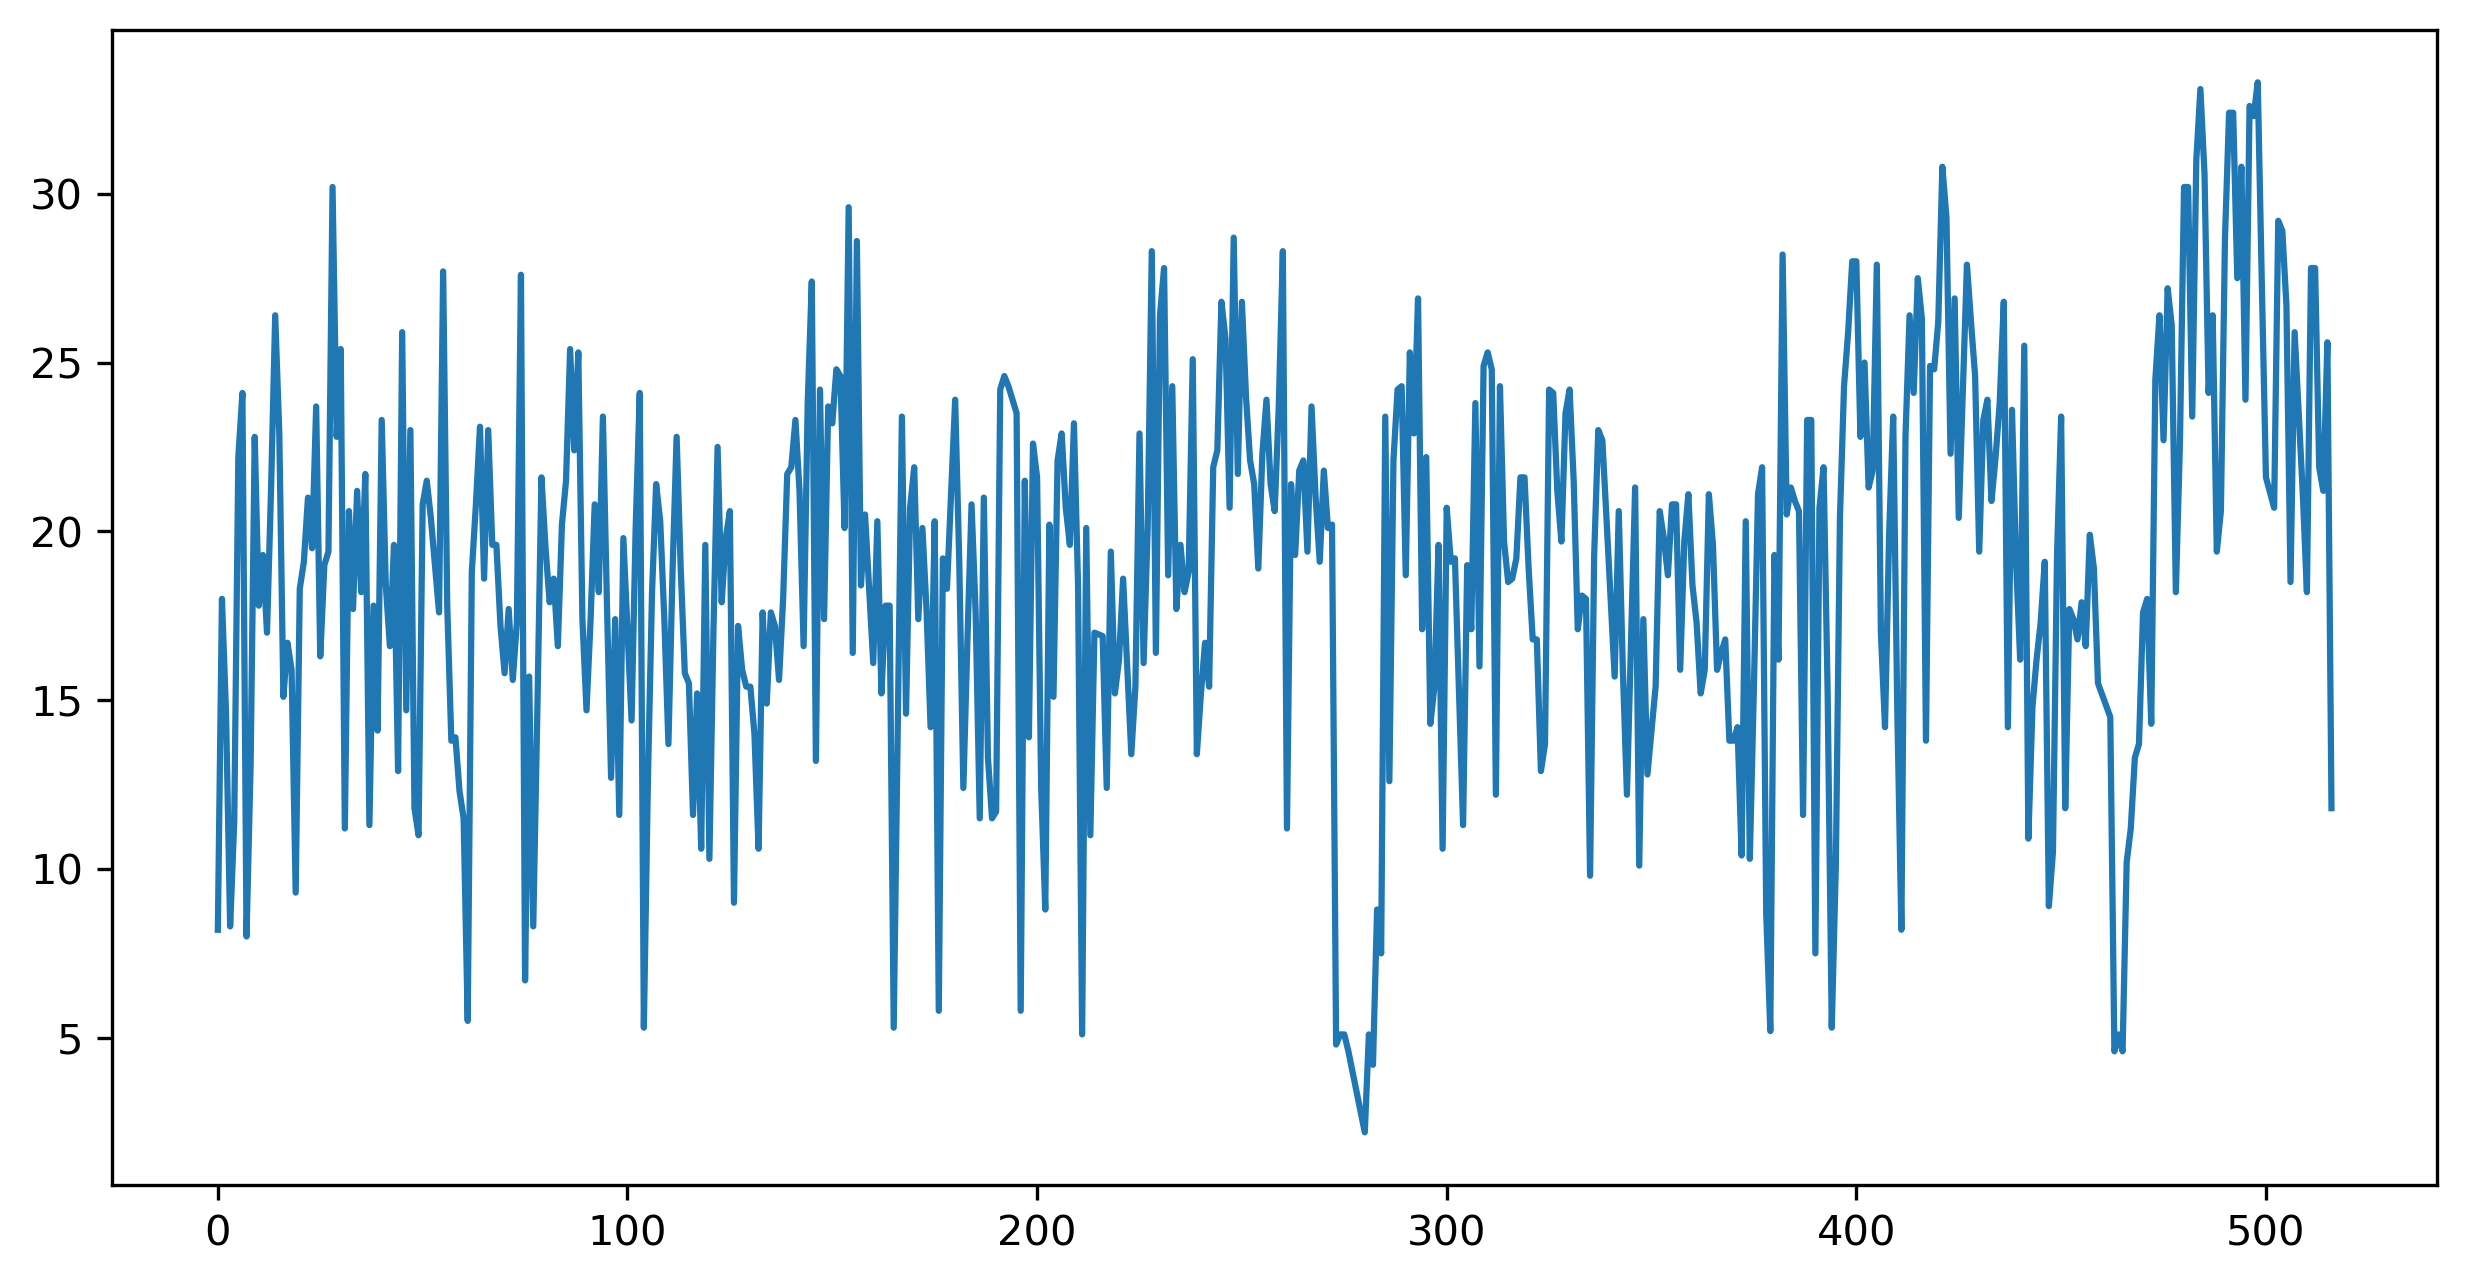

In [105]:
df['temp'].plot(kind='line')

<AxesSubplot:xlabel='DMC', ylabel='DC'>

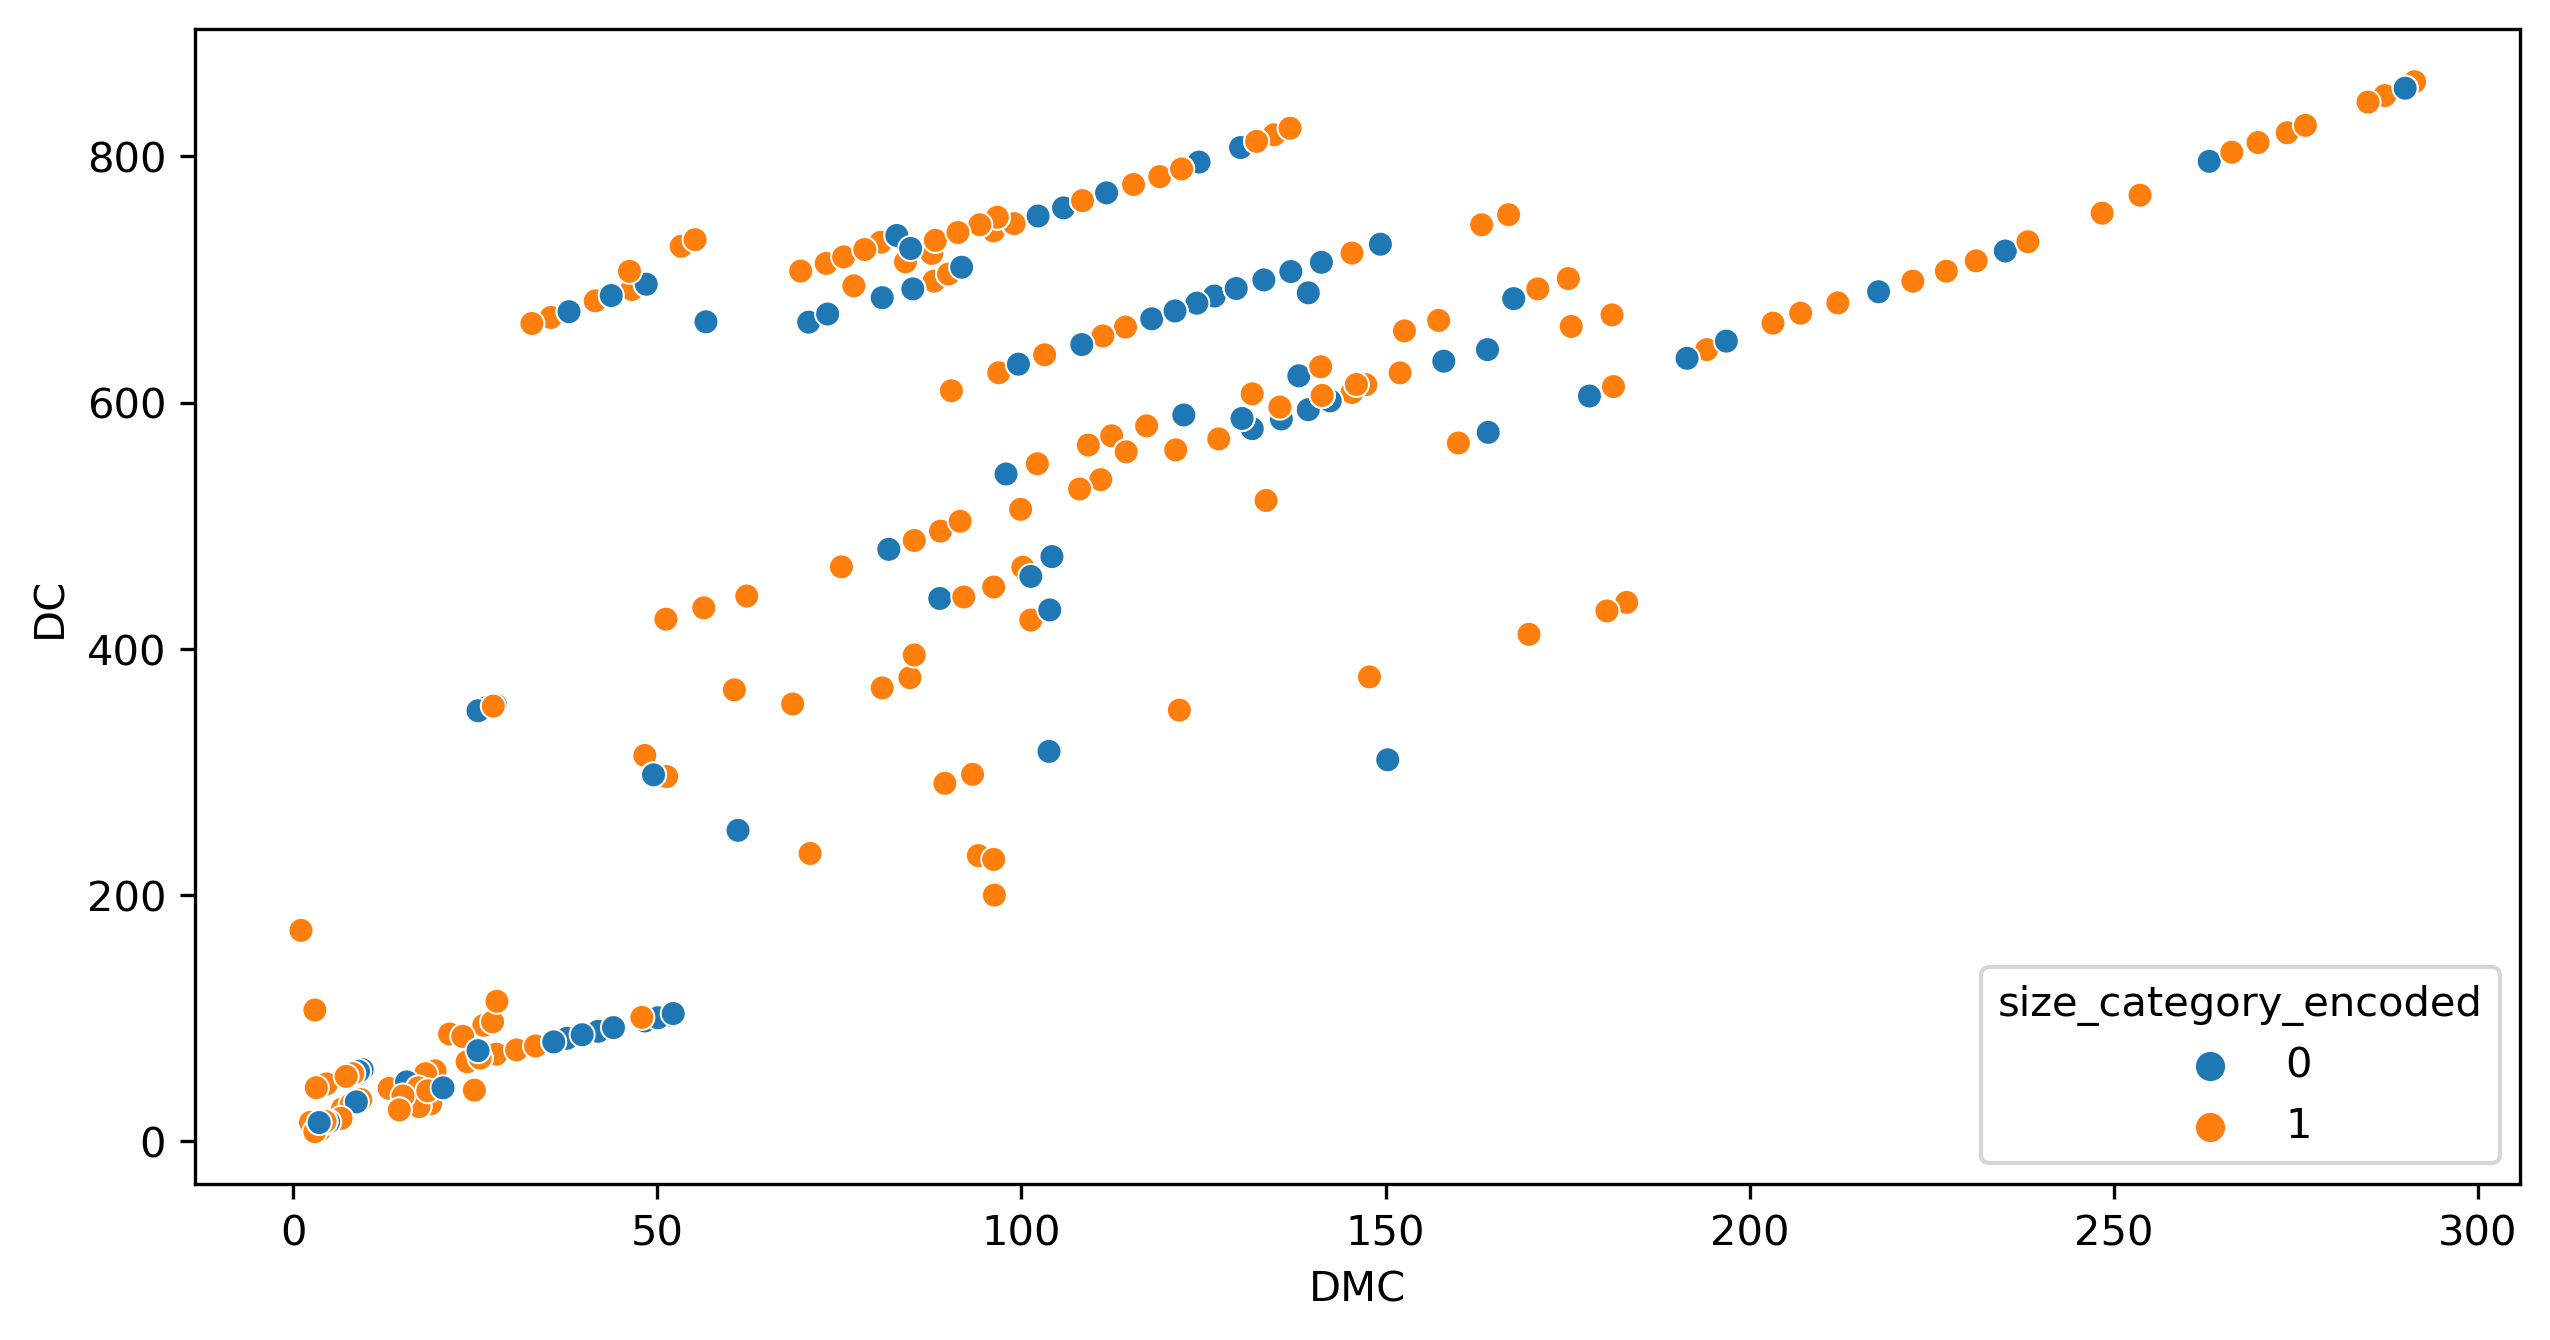

In [106]:
sns.scatterplot(x='DMC',y='DC',data=df,hue='size_category_encoded')

In [107]:
X = df.iloc[:, :-1]
X.head()
y=df.iloc[:, -1]
X.shape

(498, 27)

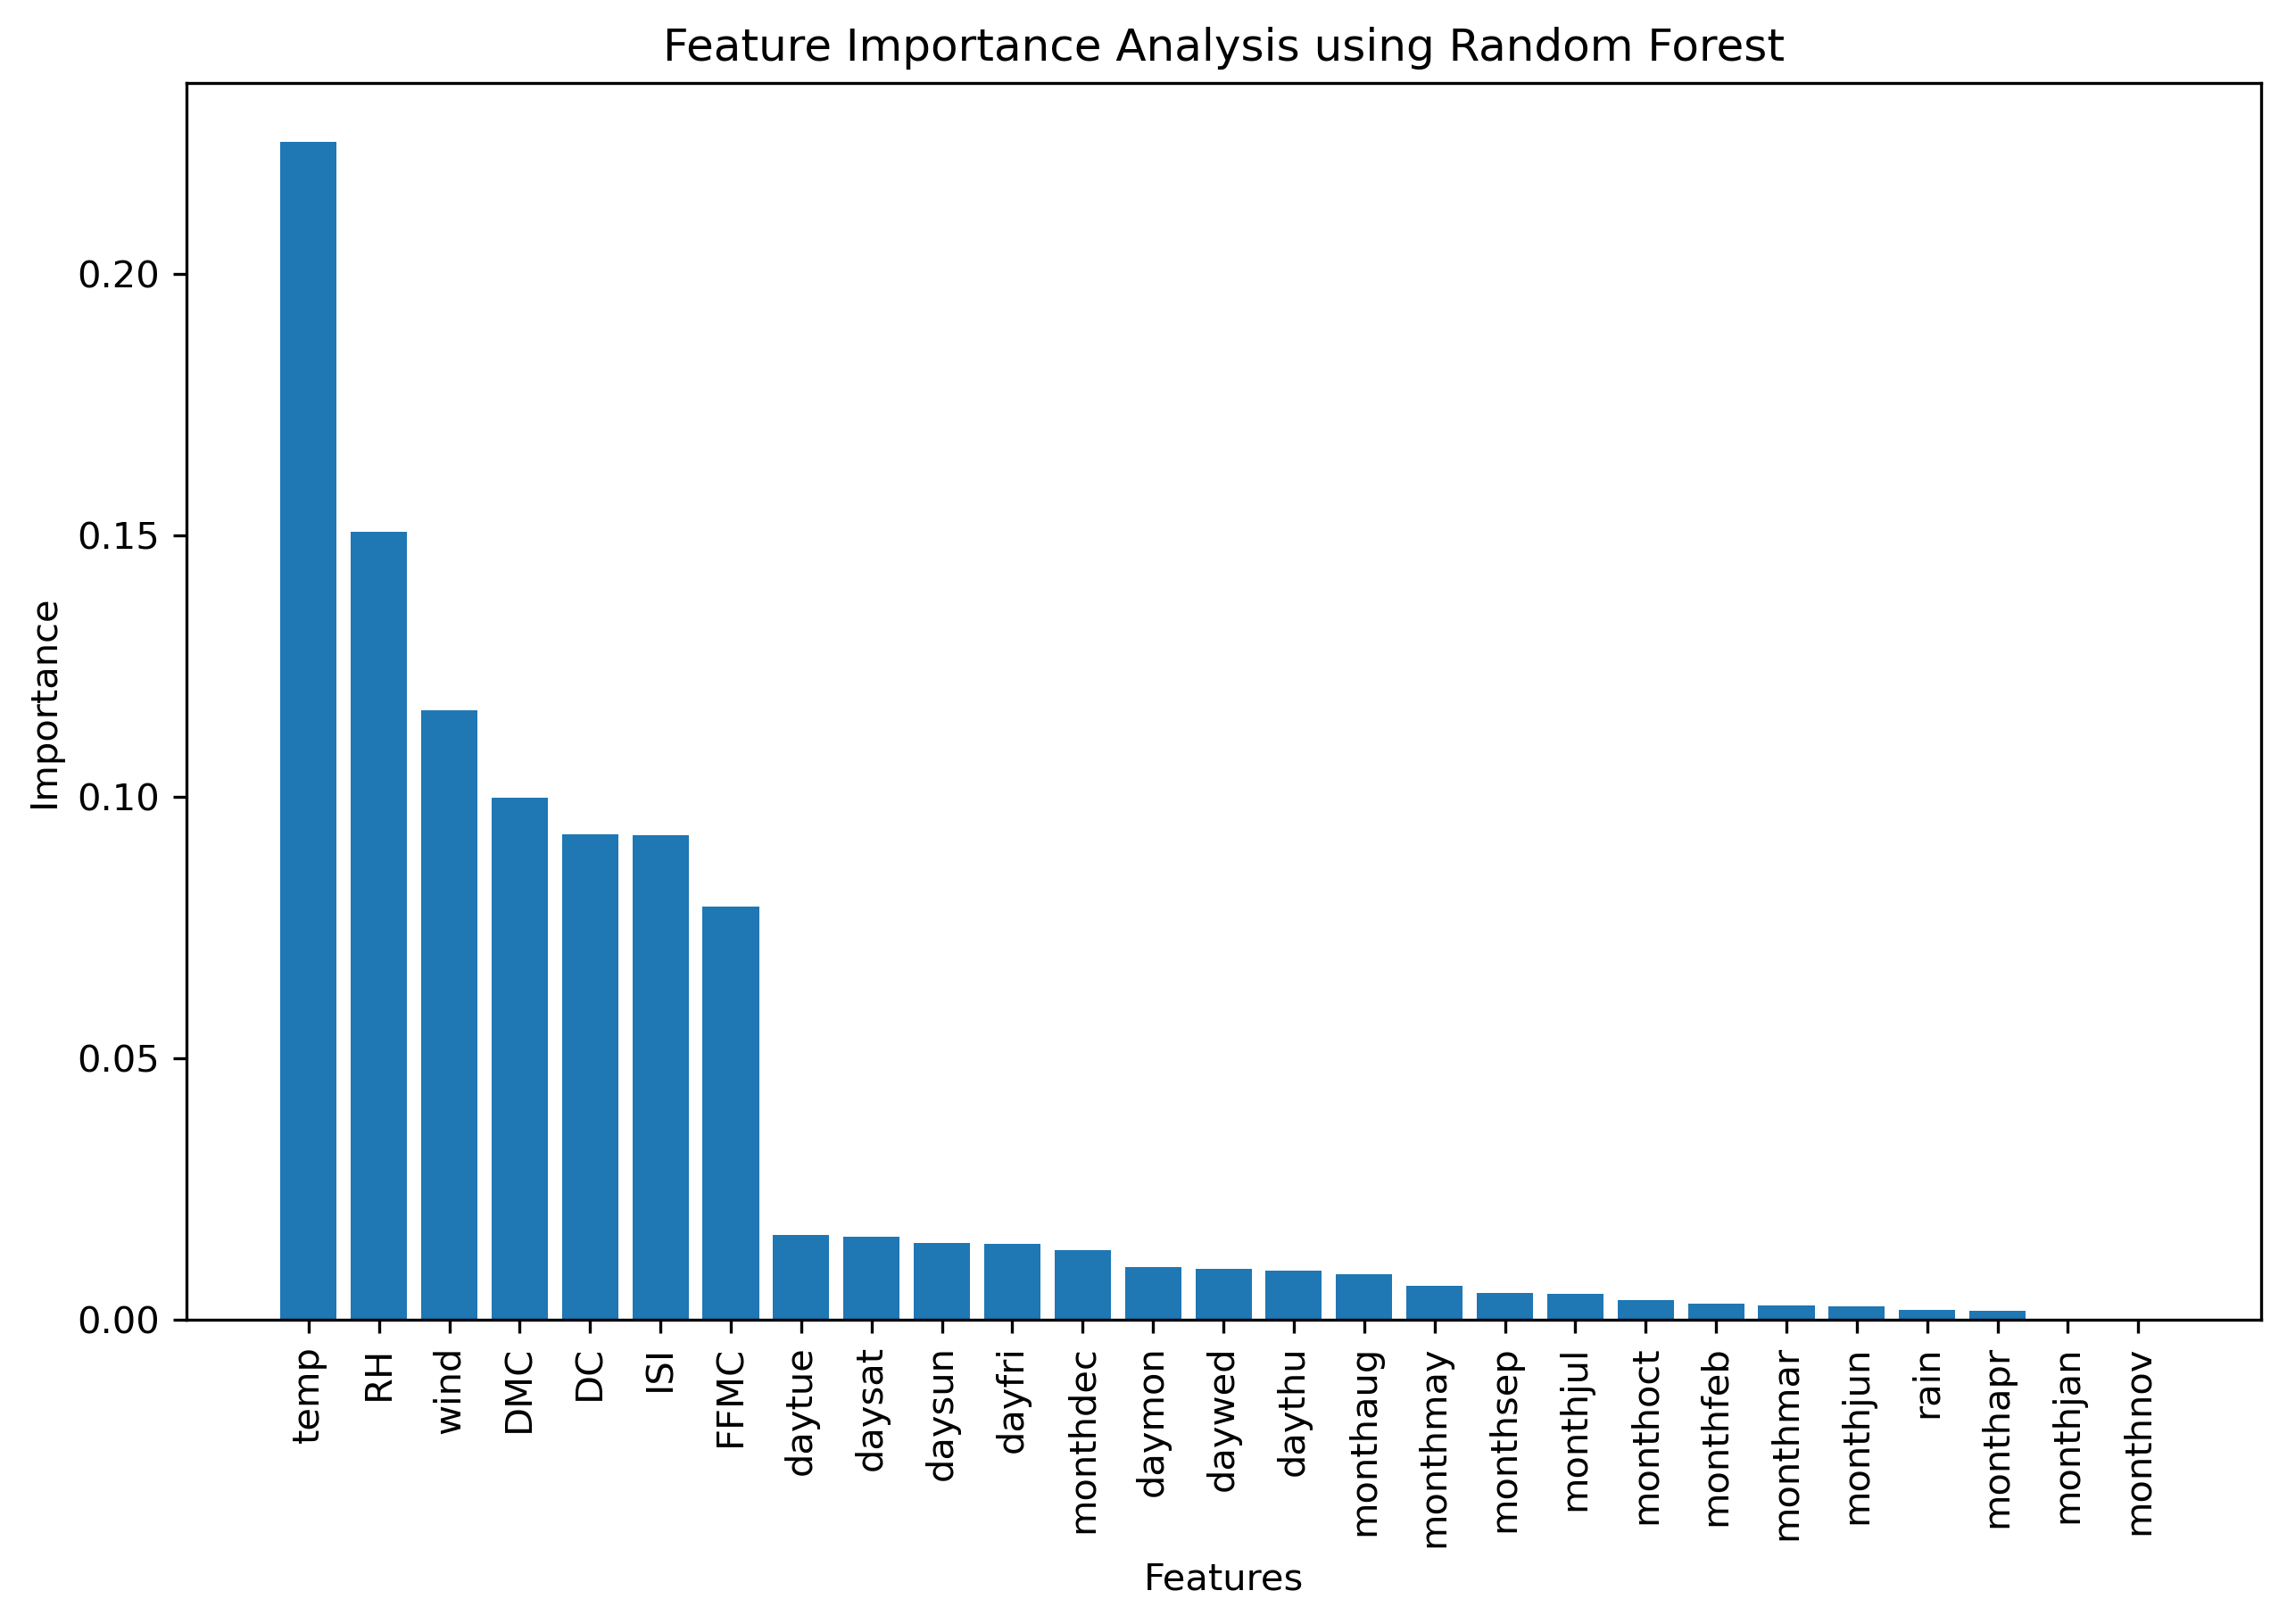

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
# Checking Feature importance
# Feature Importance Analysis using Random Forest
rf = RandomForestRegressor()
rf.fit(X, y)
importance = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]
sorted_importance = importance[indices]
sorted_columns = df.columns[:-1][indices]

# Bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_importance)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis using Random Forest')
plt.show()

In [109]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Feature importance using Principal Component Analysis (PCA)
stdalgo=StandardScaler()
stddata=stdalgo.fit_transform(X)
stddf=pd.DataFrame(stddata)
cov=stddf.cov()
values,vectors=np.linalg.eig(cov)
values

PCAalgo=PCA()
PCAalgo.fit_transform(stddf)
PCAalgo.explained_variance_ratio_
np.cumsum(PCAalgo.explained_variance_ratio_)

array([0.1393894 , 0.21096333, 0.27546531, 0.33057407, 0.37932163,
       0.42663815, 0.47186857, 0.5154183 , 0.55778806, 0.59914663,
       0.63949551, 0.67936047, 0.71708491, 0.75428903, 0.79066282,
       0.82701305, 0.86183106, 0.89351201, 0.92422049, 0.94934378,
       0.97248611, 0.98486535, 0.99427354, 0.99916165, 1.        ,
       1.        , 1.        ])

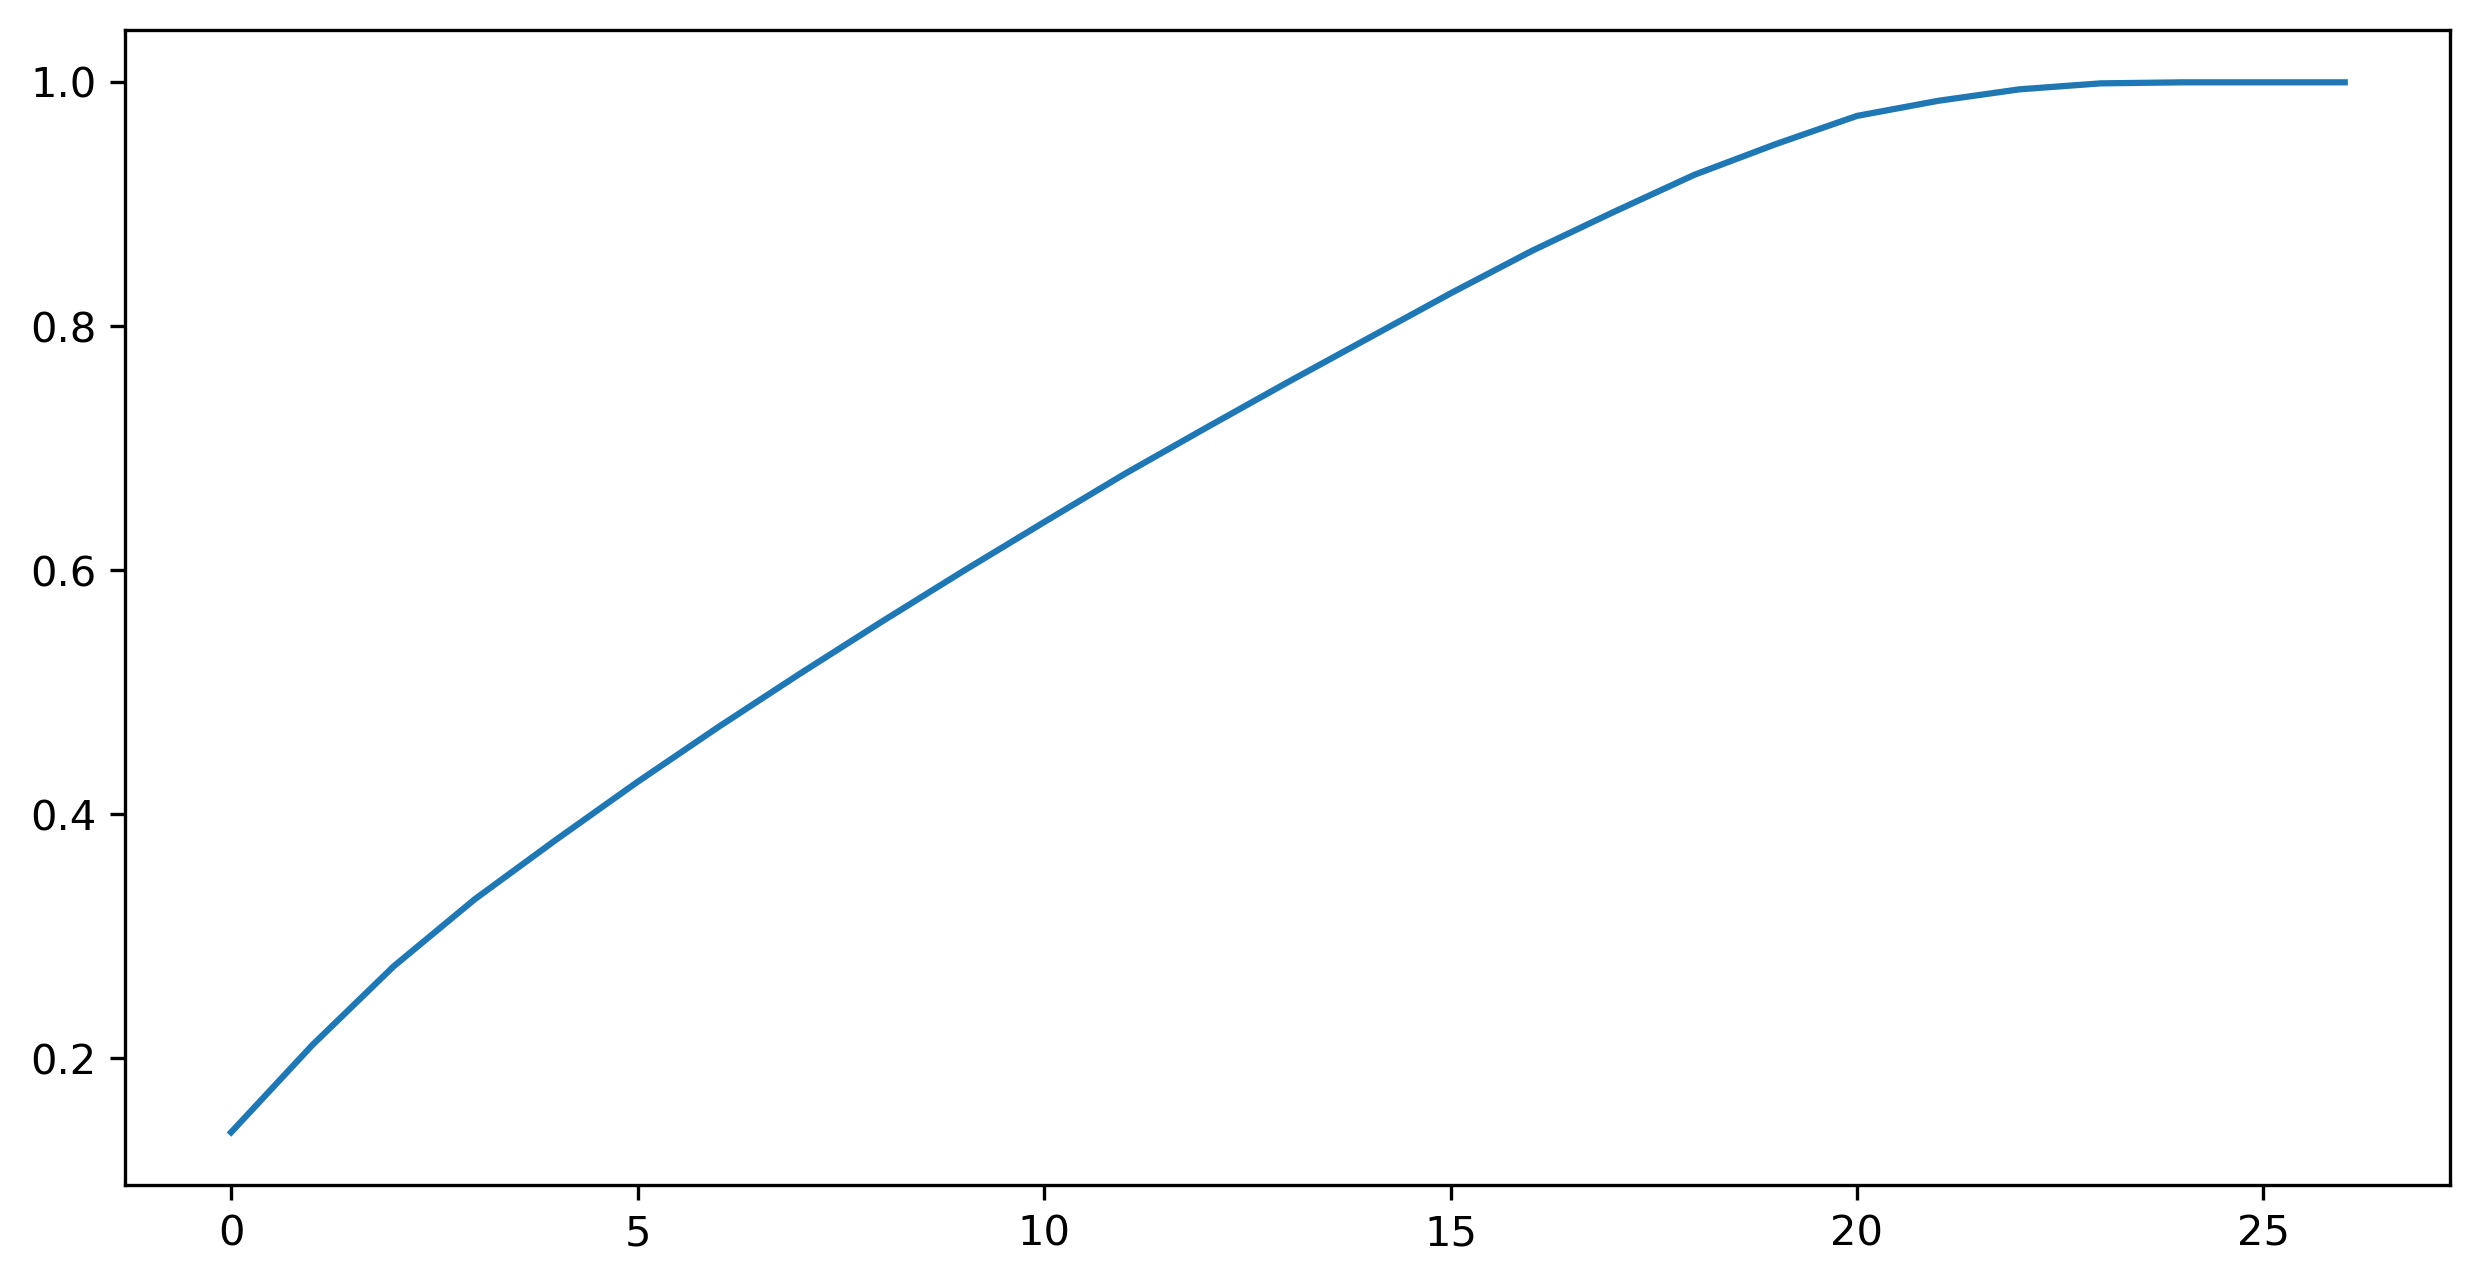

In [110]:
# Scree plot
plt.plot(np.cumsum(PCAalgo.explained_variance_ratio_))

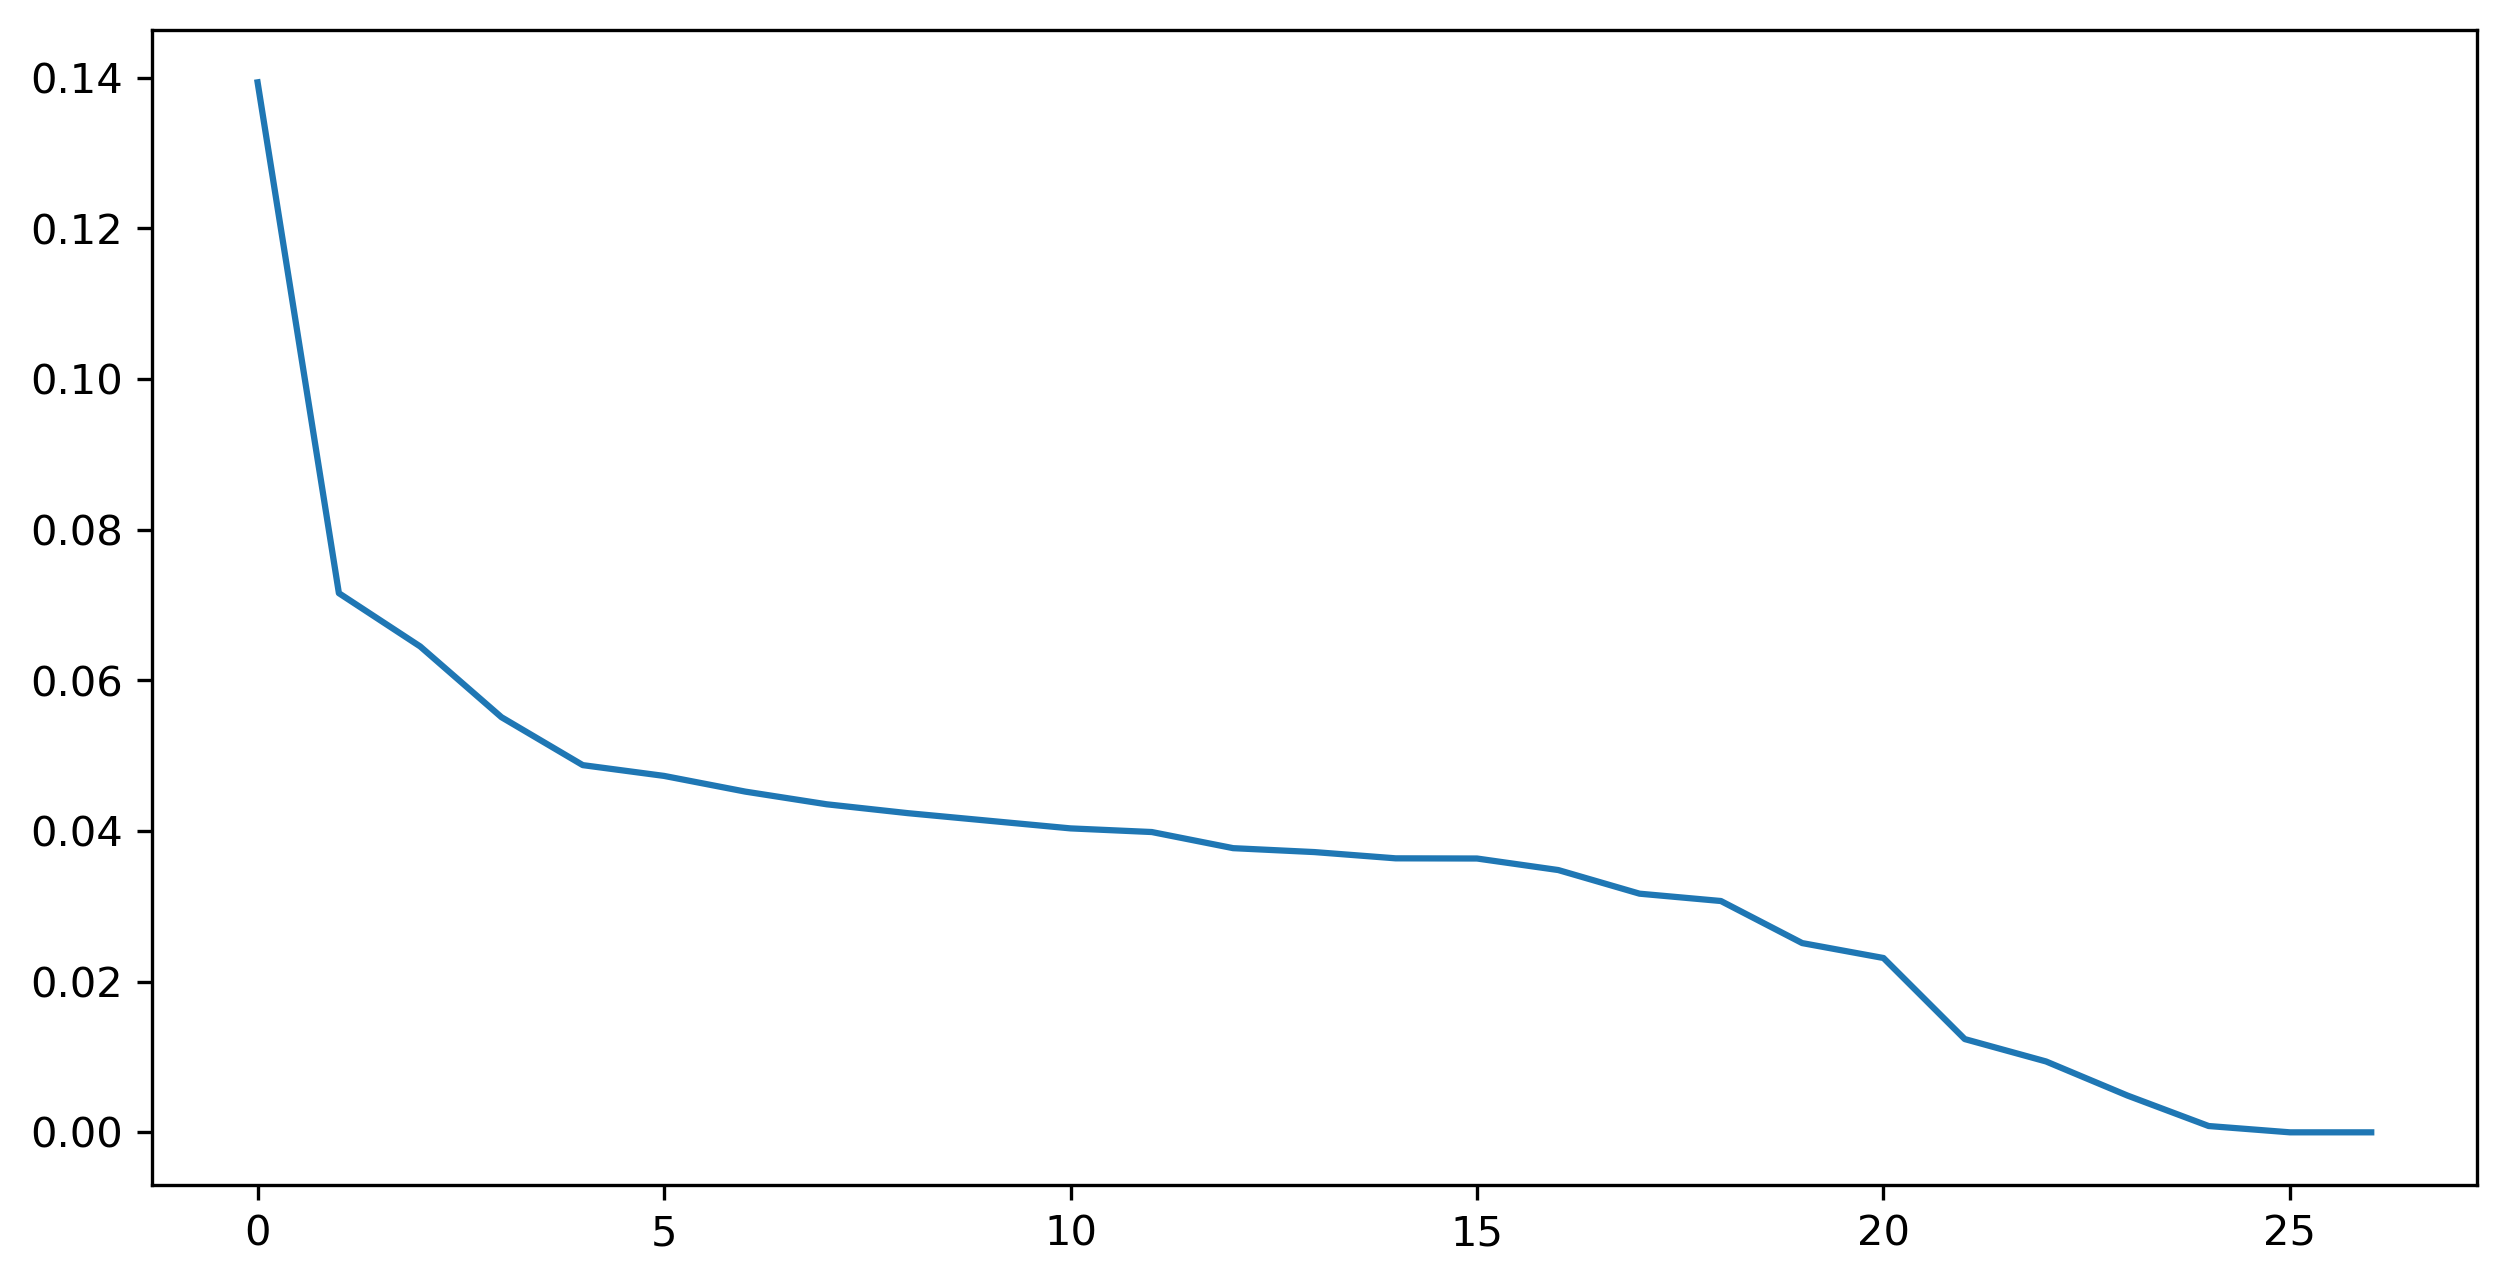

In [111]:
# Elbow Plot
plt.plot(PCAalgo.explained_variance_ratio_)

# Model building using optimizer- adadelta

In [112]:
xtrain,xtest,ytrain,ytest = train_test_split(stddf,y,test_size=0.20, random_state=1)
#Initialize model
ann = Sequential()

#Add hidden layer
ann.add(Dense(units=10,activation='relu'))

#Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between the layers
ann.compile(optimizer = 'adadelta',loss='binary_crossentropy',metrics='accuracy')

#Fit the data
ann.fit(xtrain,ytrain, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.7162 - accuracy: 0.6030
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.6030
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.6030
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.6030
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.6030
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.6030
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.6030
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.6030
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.6030
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7159 - accuracy: 0.6030
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.7140 - accuracy: 0.6005
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7140 - accuracy: 0.6005
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.6005
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.6005
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.6005
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.6005
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.6005
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.6005
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.6005
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.5980
Epoch 93/100


In [113]:
ypred = ann.predict(xtest)

4/4 [==============================] - 0s 5ms/step


In [114]:
ypred = ypred > 0.5

In [115]:
ytest

112    1
149    1
319    1
338    0
195    0
      ..
500    1
93     1
365    0
104    1
214    0
Name: size_category_encoded, Length: 100, dtype: int32

In [116]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.22      0.26      0.24        27
           1       0.71      0.66      0.68        73

    accuracy                           0.55       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.57      0.55      0.56       100



# Model building using optimizer- sgd(stochastic gradient descent)

In [117]:
xtrain,xtest,ytrain,ytest = train_test_split(stddf,y,test_size=0.20, random_state=1)
#Initialize model
ann = Sequential()

#Add hidden layer
ann.add(Dense(units=10,activation='relu'))

#Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between the layers
ann.compile(optimizer = 'sgd',loss='binary_crossentropy',metrics='accuracy')

#Fit the data
ann.fit(xtrain,ytrain, epochs=100)
ypred = ann.predict(xtest)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.7962 - accuracy: 0.4874
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7662 - accuracy: 0.5201
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7401 - accuracy: 0.5377
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7194 - accuracy: 0.5578
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.5905
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.6005
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.6281
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6558
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6683
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6734
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.7563
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.7538
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7563
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7563
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7563
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7563
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7563
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7563
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7538
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.7538
Epoch 93/100


In [118]:
ypred = ypred > 0.5

In [119]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.71      0.92      0.80        73

    accuracy                           0.67       100
   macro avg       0.36      0.46      0.40       100
weighted avg       0.52      0.67      0.59       100



# Model building using optimizer- rmsprop

In [120]:
xtrain,xtest,ytrain,ytest = train_test_split(stddf,y,test_size=0.20, random_state=1)
#Initialize model
ann = Sequential()

#Add hidden layer
ann.add(Dense(units=10,activation='relu'))

#Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between the layers
ann.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics='accuracy')

#Fit the data
ann.fit(xtrain,ytrain, epochs=100)
ypred = ann.predict(xtest)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.7287 - accuracy: 0.5452
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.5905
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.6382
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6558
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6859
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6985
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7111
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7186
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7312
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6337 - accuracy: 0.7286
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7588
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7588
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7588
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7588
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7588
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7588
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7588
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7588
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7588
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7588
Epoch 93/100


In [121]:
ypred = ypred > 0.5

In [122]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.72      0.95      0.82        73

    accuracy                           0.69       100
   macro avg       0.36      0.47      0.41       100
weighted avg       0.52      0.69      0.60       100



# Hyperparameter tuning

In [123]:
import keras_tuner as kt

In [124]:
def optimizer_selection(hp):
    #initialize the model
    model = Sequential()
    #Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    #Add output layer
    model.add(Dense(units=1, activation='sigmoid'))
    #Optimizer selection
    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop'])
    model.compile(optimizer=optim, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model

In [125]:
tuner = kt.RandomSearch(
    optimizer_selection,
    objective='val_accuracy',
    max_trials=5,
    directory = 'project',
    project_name = 'ANN')

INFO:tensorflow:Reloading Tuner from project\ANN\tuner0.json


# New model

In [126]:
tuner.search(xtrain,ytrain, epochs = 3, validation_data = (xtest,ytest))

INFO:tensorflow:Oracle triggered exit


In [127]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [128]:
X.shape

(498, 27)

# Creating new model Building using optimizer- adam suggested by hyperparameter tuning

In [129]:
xtrain,xtest,ytrain,ytest = train_test_split(stddf,y,test_size=0.20, random_state=42)
#Initialize model
ann = Sequential()

#Add hidden layer
ann.add(Dense(units=10,activation='relu'))

#Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between the layers
ann.compile(optimizer = 'adam',loss='binary_crossentropy',metrics='accuracy')

#Fit the data
ann.fit(xtrain,ytrain, epochs=100)
ypred = ann.predict(xtest)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.6256
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.6432
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6809
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.7060
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.7085
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.7060
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.7161
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.7211
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.7161
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7186
Epoch 11/

13/13 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7613
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7638
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7663
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7638
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7638
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7638
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7613
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7638
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7613
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7638
Epoch 93/100


In [130]:
ypred = ypred > 0.5

In [131]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.36      0.15      0.22        26
           1       0.75      0.91      0.82        74

    accuracy                           0.71       100
   macro avg       0.56      0.53      0.52       100
weighted avg       0.65      0.71      0.66       100



Conclusion: after doing hyperparamter tuning we got optimizer as adam with the 71% accuracy of model